In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape   #shows rows(dataset/examples) and columns(parameters)

(13320, 9)

In [4]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df2 = df1.drop(['area_type', 'society', 'balcony', 'availability'], axis = 'columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df2.isnull().sum()   #give NA values  

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))       #creating a new column

C:\Users\devbh\AppData\Local\Temp\ipykernel_3836\2989677455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))       #creating a new column


In [10]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [11]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [12]:
df3[df3.bhk>20]   #this looks like an error in the dataset, as there can not be 43 bedroom with only 2400 sqft area 

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [13]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [16]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [17]:
convert_sqft_to_num('4540')

4540.0

In [18]:
convert_sqft_to_num('1015 - 1540')

1277.5

In [19]:
convert_sqft_to_num('34.46Sq. Meter')

In [20]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(5)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [21]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [22]:
df4.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [23]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [24]:
len(df5.location.unique())

1304

In [25]:
df5.location = df5.location.apply(lambda x: x.strip())

location_stats =  df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [26]:
len(location_stats[location_stats<=10])   # no of locations having less than 10 datatypes

1052

In [27]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [28]:
len(df5.location.unique())

1293

In [29]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [30]:
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli',
       'Lingadheeranahalli', 'Kothanur', 'Whitefield', 'Old Airport Road',
       'Rajaji Nagar', 'Marathahalli', 'other', '7th Phase JP Nagar',
       'Gottigere', 'Sarjapur', 'Mysore Road', 'Bisuvanahalli',
       'Raja Rajeshwari Nagar', 'Kengeri', 'Binny Pete', 'Thanisandra',
       'Bellandur', 'Electronic City', 'Ramagondanahalli', 'Yelahanka',
       'Hebbal', 'Kasturi Nagar', 'Kanakpura Road',
       'Electronics City Phase 1', 'Kundalahalli', 'Chikkalasandra',
       'Murugeshpalya', 'Sarjapur  Road', 'HSR Layout', 'Doddathoguru',
       'KR Puram', 'Bhoganhalli', 'Lakshminarayana Pura', 'Begur Road',
       'Varthur', 'Bommanahalli', 'Gunjur', 'Devarachikkanahalli',
       'Hegde Nagar', 'Haralur Road', 'Hennur Road', 'Kothannur',
       'Kalena Agrahara', 'Kaval Byrasandra', 'ISRO Layout',
       'Garudachar Palya', 'EPIP Zone', 'Dasanapura', 'Kasavanhalli',
       'Sanjay nagar', 'Domlur', 'Sarjapura - At

In [31]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


Outlier detection and removal:
Outlier are datapoints which are data errors or not data errors but have extreme variation in data set
Although they are valid, if not removed they'll create some huge variation/errors in the model 

In [32]:
df5[df5.total_sqft/df5.bhk < 300].head()   #these are outliers data 

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [33]:
df5.shape

(13246, 7)

In [34]:
df6 = df5[~(df5.total_sqft/df5.bhk < 300)]
df6.shape

(12502, 7)

In [35]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [36]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

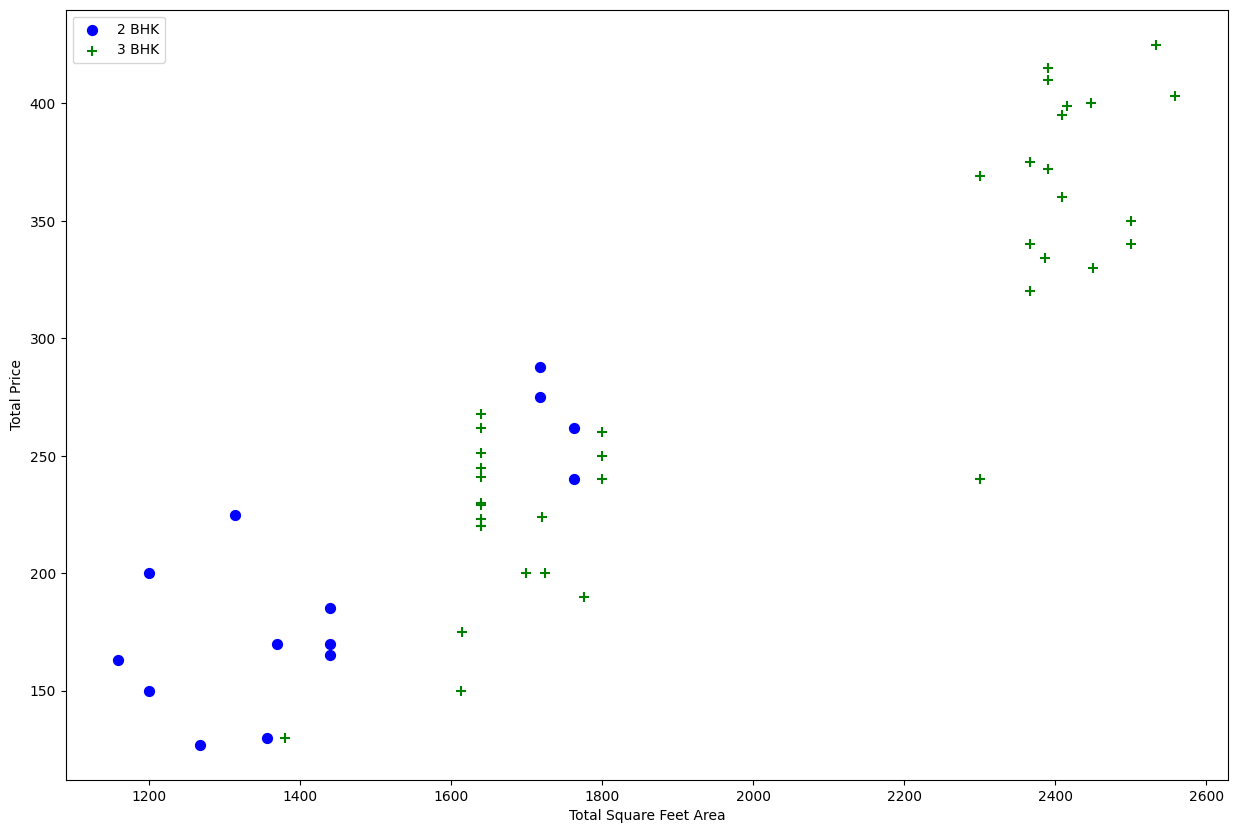

In [37]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 BHK', s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker = '+', color = 'green', label = '3 BHK', s = 50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Total Price")
    plt.legend()

plot_scatter_chart(df7, 'Rajaji Nagar')

In the above plot (for location = 'Rajaji Nagar'), we can see that there are some cases in which 2BHK houses have higher prices than 3BHK for the same area
At around 1700-1800 sq.ft area there are 4 such cases/datasets and there's also one at 1400 sq.ft 

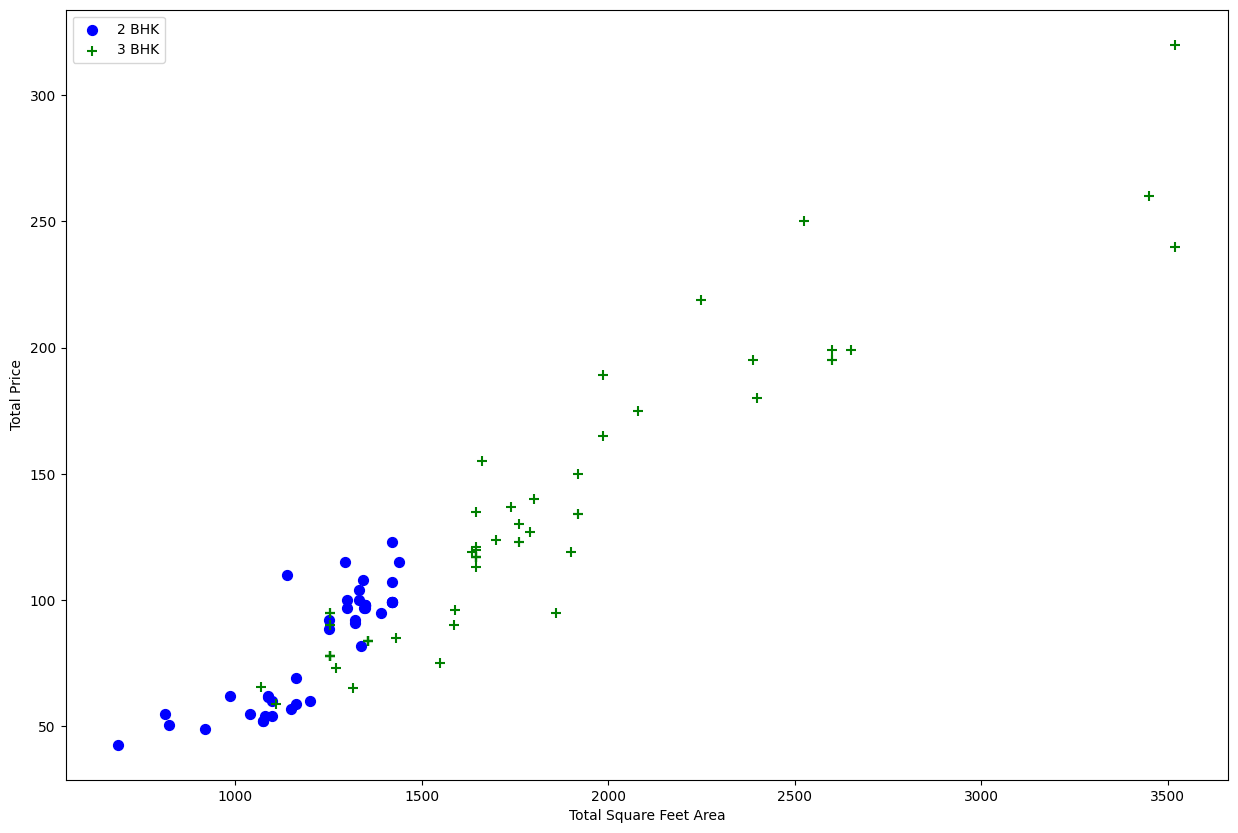

In [38]:
plot_scatter_chart(df7, "Hebbal")

**We should remove properties where for same location, the price of (for eg) 3 bedroom apartment is less than     2 bedroom apartment (with same sq.ft. area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e**

{
    '1' : {
        'mean' : 4000,
        'std' : 2000,
        'count' : 34
    },
    '2' : {
        'mean' : 4300,
        'std' : 2300,
        'count' : 22
    },
}

**Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment**

In [39]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis = 'index')

df8 = remove_bhk_outliers(df7)
df8.shape

(7329, 7)

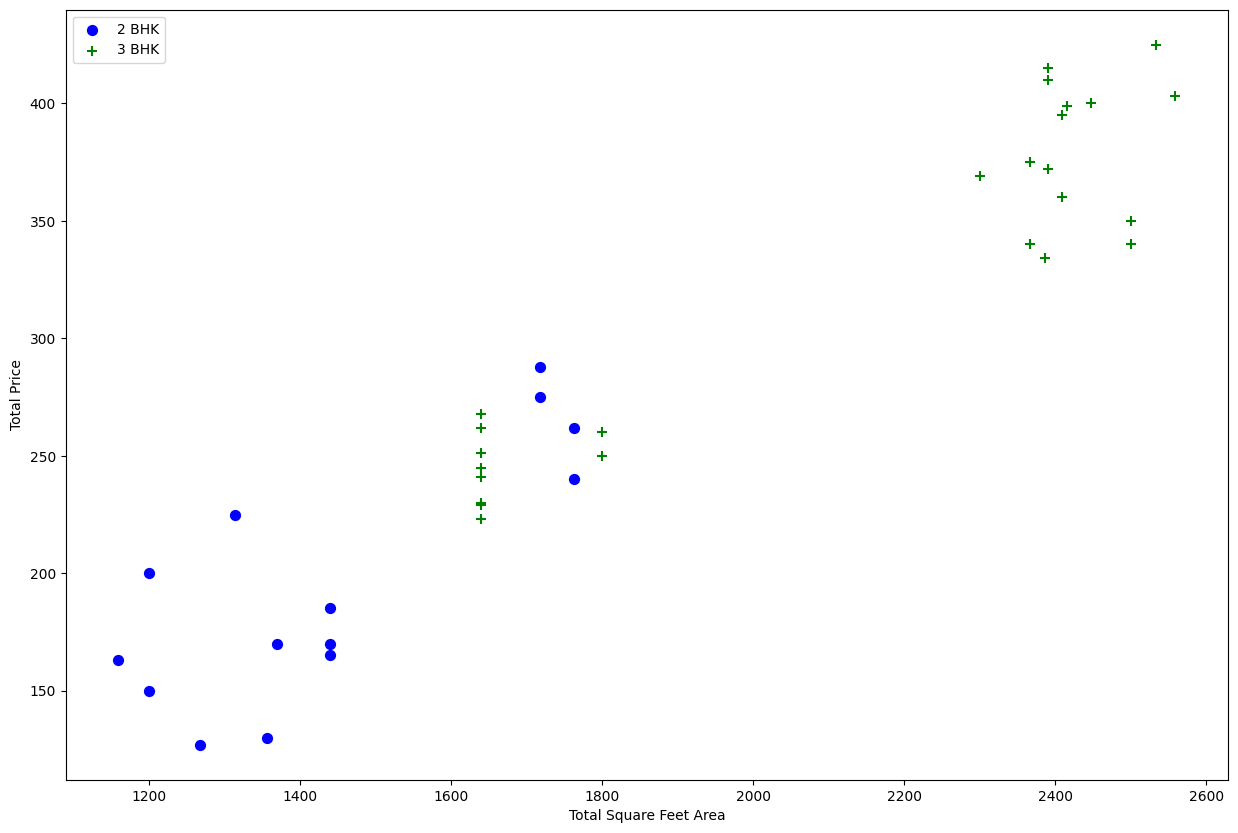

In [40]:
plot_scatter_chart(df8, "Rajaji Nagar")

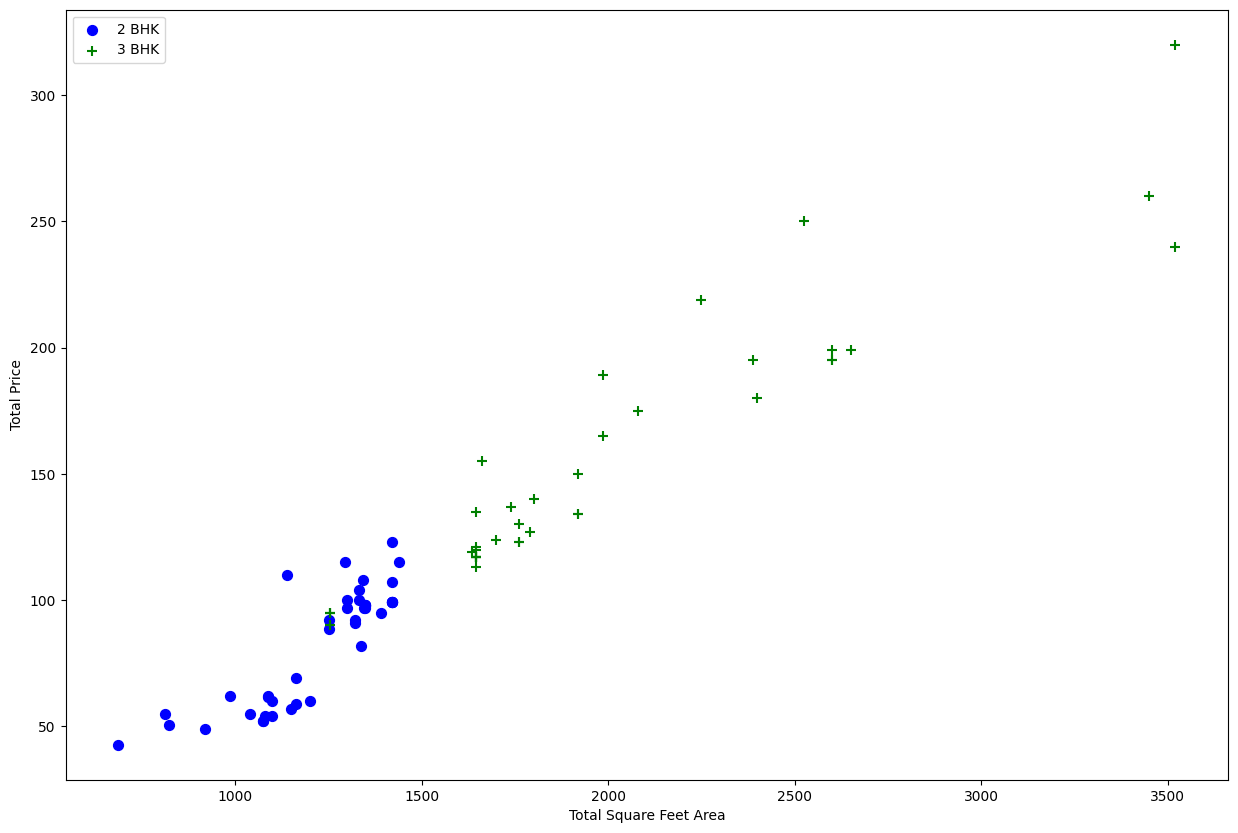

In [41]:
plot_scatter_chart(df8, "Hebbal")

Text(0, 0.5, 'Count')

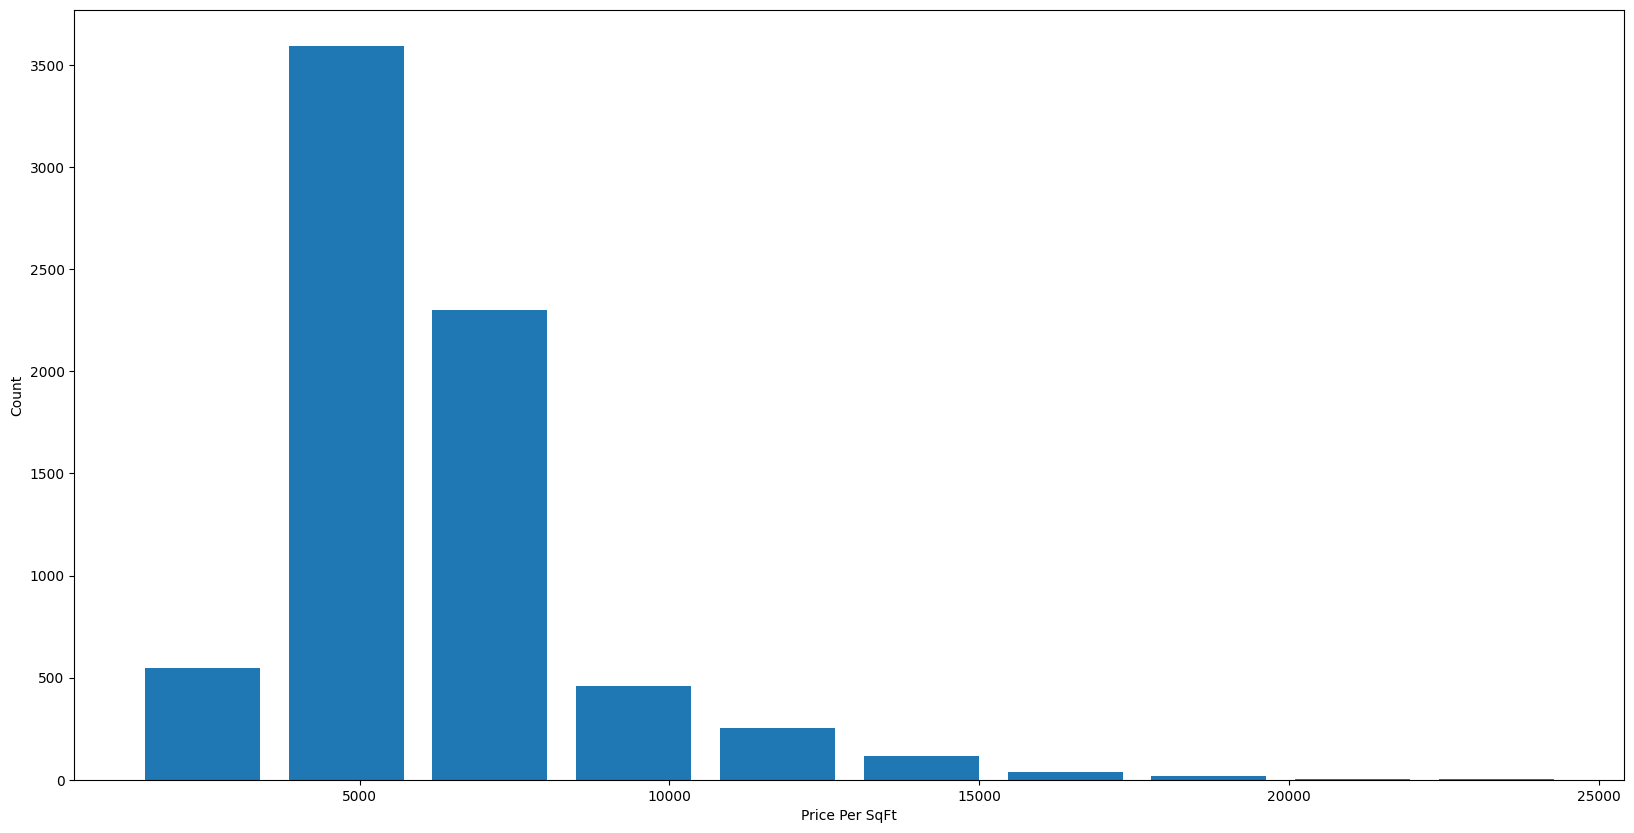

In [42]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft, rwidth= 0.8)
plt.xlabel("Price Per SqFt")
plt.ylabel("Count")

In [43]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [44]:
df8[df8.bath > 10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

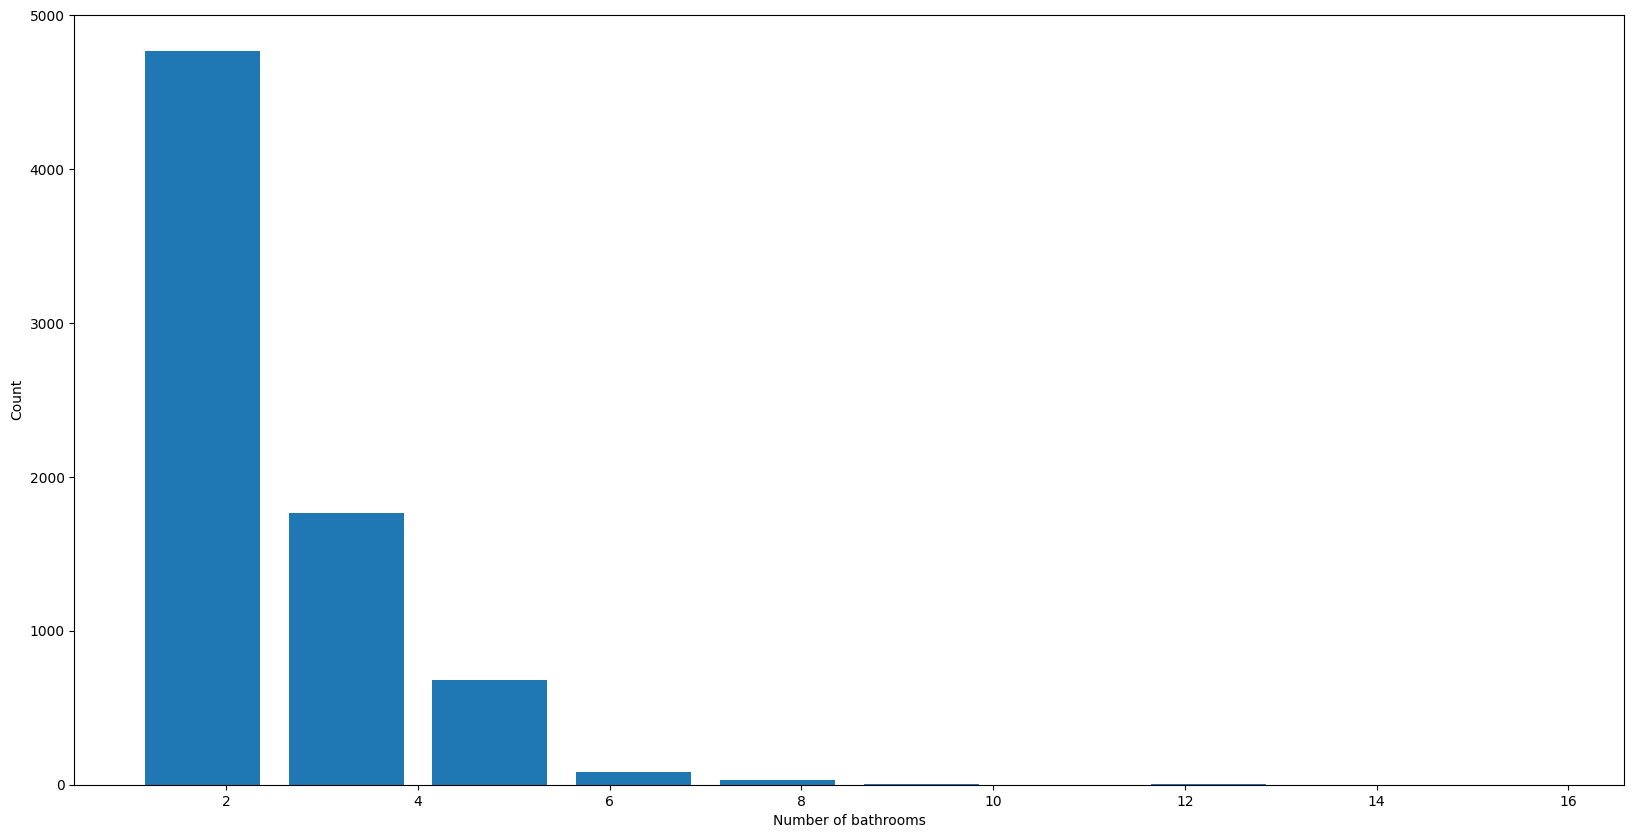

In [45]:
plt.hist(df8.bath, rwidth = 0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [46]:
df8[df8.bath > df8.bhk + 2] #these are outliers 

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [47]:
df8.shape

(7329, 7)

In [48]:
df9 = df8[df8.bath < df8.bhk + 2]
df9.shape

(7251, 7)

*We have removed pretty good amount of outliers and now will use the next dataframe for ML training*

In [49]:
df10 = df9.drop(['size', 'price_per_sqft'], axis = 'columns')
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [50]:
dummies = pd.get_dummies(df10.location)
dummies.head(20)
#this panda function assigns numerical value = 1 to a particular location name and 0 to others
#as ML models only train on numerical values and not on words/categorical values

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
df11 = pd.concat([df10, dummies.drop('other',axis = 'columns')], axis = 'columns')
#this function concatinates 2 dataframes, here df10 and dummies along the column (axis = 'columns')
#in dummies we are dropping the last column named other cause for some hotencoding reason

df11.head(20)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1st Block Jayanagar,2750.0,4.0,413.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1st Block Jayanagar,2450.0,4.0,368.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1st Phase JP Nagar,1875.0,3.0,167.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1st Phase JP Nagar,1500.0,5.0,85.0,5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1st Phase JP Nagar,2065.0,4.0,210.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


*Now we can drop the location column from df11*

In [52]:
df12 = df11.drop('location', axis = 'columns')
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
df12.shape

(7251, 245)

In [54]:
X = df12.drop('price', axis = 'columns')
#X should have only independent variables and price is a dependant variable
X.head(15)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2750.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2450.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1875.0,3.0,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1500.0,5.0,5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,2065.0,4.0,3,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
col_list = list(X)
col_list

['total_sqft',
 'bath',
 'bhk',
 '1st Block Jayanagar',
 '1st Phase JP Nagar',
 '2nd Phase Judicial Layout',
 '2nd Stage Nagarbhavi',
 '5th Block Hbr Layout',
 '5th Phase JP Nagar',
 '6th Phase JP Nagar',
 '7th Phase JP Nagar',
 '8th Phase JP Nagar',
 '9th Phase JP Nagar',
 'AECS Layout',
 'Abbigere',
 'Akshaya Nagar',
 'Ambalipura',
 'Ambedkar Nagar',
 'Amruthahalli',
 'Anandapura',
 'Ananth Nagar',
 'Anekal',
 'Anjanapura',
 'Ardendale',
 'Arekere',
 'Attibele',
 'BEML Layout',
 'BTM 2nd Stage',
 'BTM Layout',
 'Babusapalaya',
 'Badavala Nagar',
 'Balagere',
 'Banashankari',
 'Banashankari Stage II',
 'Banashankari Stage III',
 'Banashankari Stage V',
 'Banashankari Stage VI',
 'Banaswadi',
 'Banjara Layout',
 'Bannerghatta',
 'Bannerghatta Road',
 'Basavangudi',
 'Basaveshwara Nagar',
 'Battarahalli',
 'Begur',
 'Begur Road',
 'Bellandur',
 'Benson Town',
 'Bharathi Nagar',
 'Bhoganhalli',
 'Billekahalli',
 'Binny Pete',
 'Bisuvanahalli',
 'Bommanahalli',
 'Bommasandra',
 'Bommasand

In [56]:
swap_list = ['total_sqft',
 'bhk',
 'bath',
 '1st Block Jayanagar',
 '1st Phase JP Nagar',
 '2nd Phase Judicial Layout',
 '2nd Stage Nagarbhavi',
 '5th Block Hbr Layout',
 '5th Phase JP Nagar',
 '6th Phase JP Nagar',
 '7th Phase JP Nagar',
 '8th Phase JP Nagar',
 '9th Phase JP Nagar',
 'AECS Layout',
 'Abbigere',
 'Akshaya Nagar',
 'Ambalipura',
 'Ambedkar Nagar',
 'Amruthahalli',
 'Anandapura',
 'Ananth Nagar',
 'Anekal',
 'Anjanapura',
 'Ardendale',
 'Arekere',
 'Attibele',
 'BEML Layout',
 'BTM 2nd Stage',
 'BTM Layout',
 'Babusapalaya',
 'Badavala Nagar',
 'Balagere',
 'Banashankari',
 'Banashankari Stage II',
 'Banashankari Stage III',
 'Banashankari Stage V',
 'Banashankari Stage VI',
 'Banaswadi',
 'Banjara Layout',
 'Bannerghatta',
 'Bannerghatta Road',
 'Basavangudi',
 'Basaveshwara Nagar',
 'Battarahalli',
 'Begur',
 'Begur Road',
 'Bellandur',
 'Benson Town',
 'Bharathi Nagar',
 'Bhoganhalli',
 'Billekahalli',
 'Binny Pete',
 'Bisuvanahalli',
 'Bommanahalli',
 'Bommasandra',
 'Bommasandra Industrial Area',
 'Bommenahalli',
 'Brookefield',
 'Budigere',
 'CV Raman Nagar',
 'Chamrajpet',
 'Chandapura',
 'Channasandra',
 'Chikka Tirupathi',
 'Chikkabanavar',
 'Chikkalasandra',
 'Choodasandra',
 'Cooke Town',
 'Cox Town',
 'Cunningham Road',
 'Dasanapura',
 'Dasarahalli',
 'Devanahalli',
 'Devarachikkanahalli',
 'Dodda Nekkundi',
 'Doddaballapur',
 'Doddakallasandra',
 'Doddathoguru',
 'Domlur',
 'Dommasandra',
 'EPIP Zone',
 'Electronic City',
 'Electronic City Phase II',
 'Electronics City Phase 1',
 'Frazer Town',
 'GM Palaya',
 'Garudachar Palya',
 'Giri Nagar',
 'Gollarapalya Hosahalli',
 'Gottigere',
 'Green Glen Layout',
 'Gubbalala',
 'Gunjur',
 'HAL 2nd Stage',
 'HBR Layout',
 'HRBR Layout',
 'HSR Layout',
 'Haralur Road',
 'Harlur',
 'Hebbal',
 'Hebbal Kempapura',
 'Hegde Nagar',
 'Hennur',
 'Hennur Road',
 'Hoodi',
 'Horamavu Agara',
 'Horamavu Banaswadi',
 'Hormavu',
 'Hosa Road',
 'Hosakerehalli',
 'Hoskote',
 'Hosur Road',
 'Hulimavu',
 'ISRO Layout',
 'ITPL',
 'Iblur Village',
 'Indira Nagar',
 'JP Nagar',
 'Jakkur',
 'Jalahalli',
 'Jalahalli East',
 'Jigani',
 'Judicial Layout',
 'KR Puram',
 'Kadubeesanahalli',
 'Kadugodi',
 'Kaggadasapura',
 'Kaggalipura',
 'Kaikondrahalli',
 'Kalena Agrahara',
 'Kalyan nagar',
 'Kambipura',
 'Kammanahalli',
 'Kammasandra',
 'Kanakapura',
 'Kanakpura Road',
 'Kannamangala',
 'Karuna Nagar',
 'Kasavanhalli',
 'Kasturi Nagar',
 'Kathriguppe',
 'Kaval Byrasandra',
 'Kenchenahalli',
 'Kengeri',
 'Kengeri Satellite Town',
 'Kereguddadahalli',
 'Kodichikkanahalli',
 'Kodigehaali',
 'Kodigehalli',
 'Kodihalli',
 'Kogilu',
 'Konanakunte',
 'Koramangala',
 'Kothannur',
 'Kothanur',
 'Kudlu',
 'Kudlu Gate',
 'Kumaraswami Layout',
 'Kundalahalli',
 'LB Shastri Nagar',
 'Laggere',
 'Lakshminarayana Pura',
 'Lingadheeranahalli',
 'Magadi Road',
 'Mahadevpura',
 'Mahalakshmi Layout',
 'Mallasandra',
 'Malleshpalya',
 'Malleshwaram',
 'Marathahalli',
 'Margondanahalli',
 'Marsur',
 'Mico Layout',
 'Munnekollal',
 'Murugeshpalya',
 'Mysore Road',
 'NGR Layout',
 'NRI Layout',
 'Nagarbhavi',
 'Nagasandra',
 'Nagavara',
 'Nagavarapalya',
 'Narayanapura',
 'Neeladri Nagar',
 'Nehru Nagar',
 'OMBR Layout',
 'Old Airport Road',
 'Old Madras Road',
 'Padmanabhanagar',
 'Pai Layout',
 'Panathur',
 'Parappana Agrahara',
 'Pattandur Agrahara',
 'Poorna Pragna Layout',
 'Prithvi Layout',
 'R.T. Nagar',
 'Rachenahalli',
 'Raja Rajeshwari Nagar',
 'Rajaji Nagar',
 'Rajiv Nagar',
 'Ramagondanahalli',
 'Ramamurthy Nagar',
 'Rayasandra',
 'Sahakara Nagar',
 'Sanjay nagar',
 'Sarakki Nagar',
 'Sarjapur',
 'Sarjapur  Road',
 'Sarjapura - Attibele Road',
 'Sector 2 HSR Layout',
 'Sector 7 HSR Layout',
 'Seegehalli',
 'Shampura',
 'Shivaji Nagar',
 'Singasandra',
 'Somasundara Palya',
 'Sompura',
 'Sonnenahalli',
 'Subramanyapura',
 'Sultan Palaya',
 'TC Palaya',
 'Talaghattapura',
 'Thanisandra',
 'Thigalarapalya',
 'Thubarahalli',
 'Thyagaraja Nagar',
 'Tindlu',
 'Tumkur Road',
 'Ulsoor',
 'Uttarahalli',
 'Varthur',
 'Varthur Road',
 'Vasanthapura',
 'Vidyaranyapura',
 'Vijayanagar',
 'Vishveshwarya Layout',
 'Vishwapriya Layout',
 'Vittasandra',
 'Whitefield',
 'Yelachenahalli',
 'Yelahanka',
 'Yelahanka New Town',
 'Yelenahalli',
 'Yeshwanthpur']

In [57]:
X = X.reindex(columns=swap_list) 
X.head(15) 

,total_sqft,bhk,bath,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,3,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,3,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2750.0,4,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2450.0,4,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1875.0,3,3.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1500.0,5,5.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,2065.0,3,4.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [72]:
final = pd.concat([X, y], axis='columns')
final.head()

,total_sqft,bhk,bath,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,price
0,2850.0,4,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,428.0
1,1630.0,3,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,194.0
2,1875.0,3,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,235.0
3,1200.0,3,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,130.0
4,1235.0,2,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,148.0


In [ ]:
final.to_csv('Final Dataframe.csv')

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)
# train_test_split split's our dataset for training and testing models
# here test_size = 0.2 indicates that 20% of the dataset is used for testing and the rest is used for training 
 

In [60]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test) #tells how good our model is 

0.8452277697874357

In [61]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

New Version of sklearn doesn't take the following inputs as shown in the tutorial, so comment the next code cell 

In [62]:
# from sklearn.model_selection import GridSearchCV

# from sklearn.linear_model import Lasso
# from sklearn.tree import DecisionTreeRegressor

# def find_best_model_using_gridsearchcv(X,y):
#     algos = {
#         'linear_regression' : 
#             {
#                 'model' : LinearRegression(),
#                 'params' : { 'normalize' : [True] }
#             },

#         'lasso' : 
#             {
#                 'model' : Lasso(),
#                 'params' : { 'alpha' : [1,2],  'selection' : ['random', 'cyclic'] }
#             },

#         'decision_tree' : 
#             {
#                 'model' : DecisionTreeRegressor(),
#                 'params' : { 'criterion' : ['squared_error', 'friedman_mse'],  'splitter' : ['best', 'random'] }
#             }                                  
#         }


#     scores = []
#     cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
#     for algo_name, config in algos.items():
#         gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
#         gs.fit(X,y)
#         scores.append({
#             'model' : algo_name,
#             'best_score' : gs.best_score_,
#             'best_params' : gs.best_params_
#         })

#     return pd.DataFrame(scores, columns = ['model', 'best_socre', 'best_params'])

# find_best_model_using_gridsearchcv(X, y)



<pre>
The output of the above code cell is as follows (in the tutorial video):
          model	             best_score	              best_params
0	linear_regression     0.847796	         {'normalize': False}
1	lasso	              0.726738	      {'alpha': 2, 'selection': 'cyclic'}
2	decision_tree	      0.716064	   {'criterion': 'friedman_mse', 'splitter': 'best'}
</pre>

From the above output we get that the model LinearRegression() has the highest score ie of 84% with normalize set as False

In [63]:
X.columns 

Index(['total_sqft', 'bhk', 'bath', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [64]:
np.where(X.columns == '2nd Phase Judicial Layout')[0][0]

5

In [65]:
def predict_price(location, sqft, bhk, bath):
    loc_index = np.where(X.columns == location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bhk
    x[2] = bath
    if loc_index >= 0:
        x[loc_index] = 1
    
    return lr.predict([x])[0]

In [66]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

c:\Users\devbh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904677198505

In [67]:
predict_price('1st Phase JP Nagar', 1000, 3, 4)

c:\Users\devbh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


91.88421889676013

In [68]:
predict_price('Indira Nagar', 1000, 2, 2)

c:\Users\devbh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


181.27815484006544

In [69]:
import pickle
with open('Bangalore Real Estate Price Prediction.pickle', 'wb') as f:
    pickle.dump(lr, f)

In [70]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))